In [1]:
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('corona_updated.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(1502, 5)

In [3]:
df['date'] = pd.to_datetime(df['date'])
# , format='%m%d'

In [62]:
df.tail()

,Country,TotalCases,TotalDeaths,TotalRecovered,date
1497,Diamond Princess,696,6.0,212.0,2020-03-06
1498,Italy,4636,197.0,523.0,2020-03-06
1499,Iran,4747,124.0,913.0,2020-03-06
1500,S. Korea,6593,43.0,135.0,2020-03-06
1501,China,80576,3042.0,53929.0,2020-03-06


### Countries

In [26]:
df['Country'] = df['Country'].apply(lambda x: x.replace('USA *', 'USA'))
df['Country'] = df['Country'].apply(lambda x: x.replace('U.S.', 'USA'))
df['Country'] = df['Country'].apply(lambda x: x.replace('United States', 'USA'))
df['Country'] = df['Country'].apply(lambda x: x.replace('United Kingdom', 'UK'))
df['Country'] = df['Country'].apply(lambda x: x.replace('U.K.', 'UK'))

In [27]:
countries = df['Country'].unique()

In [28]:
len(countries)

103

In [29]:
countries

array(['Sri Lanka', 'Finland', 'United Arab Emirates', 'Nepal',
       'Cambodia', 'Vietnam', 'Canada', 'Germany', 'France',
       'South Korea', 'USA', 'Australia', 'Japan', 'Singapore',
       'Malaysia', 'Macau', 'Taiwan', 'Hong Kong', 'Thailand', 'China',
       'India', 'Philippines', 'Sweden', 'UK', 'Italy', 'Russia', 'Macao',
       'Spain', 'U.A.E.', 'Belgium', 'S. Korea', 'Egypt', 'Cruise Ship',
       'Diamond Princess', 'Iran', 'Lebanon', 'Israel', 'Iraq', 'Bahrain',
       'Afghanistan', 'Oman', 'Kuwait', 'Switzerland', 'Croatia',
       'Austria', 'North Macedonia', 'Greece', 'Brazil', 'Algeria',
       'Pakistan', 'Romania', 'Norway', 'Georgia', 'Estonia', 'Denmark',
       'San Marino', 'Nigeria', 'New Zealand', 'Lithuania', 'Iceland',
       'Belarus', 'Azerbaijan', 'Netherlands', 'Mexico', 'Qatar',
       'Monaco', 'Ecuador', 'Armenia', 'Luxembourg', 'Ireland',
       'Dominican Republic', 'Czechia', 'Tunisia', 'Senegal',
       'Saudi Arabia', 'Morocco', 'Latvia', 'J

In [31]:
def countrydf(country, df):
    country_df = df[df['Country'] == country]
    return country_df

In [53]:
def country_total_plot(country_df):
    plt.figure(figsize=(12,8))
    sns.barplot(country_df['date'].dt.date, country_df['TotalCases'], palette="GnBu_d")
    plt.xticks(rotation=90, fontsize=13)
    plt.title(f'Total Cases of CVOID-19 by Date {country_df.iloc[0,0]}', fontsize=20)
    plt.ylabel('# of cases', fontsize=16)
    plt.xlabel('Date', fontsize=16)

In [60]:
USA = countrydf('USA', df)

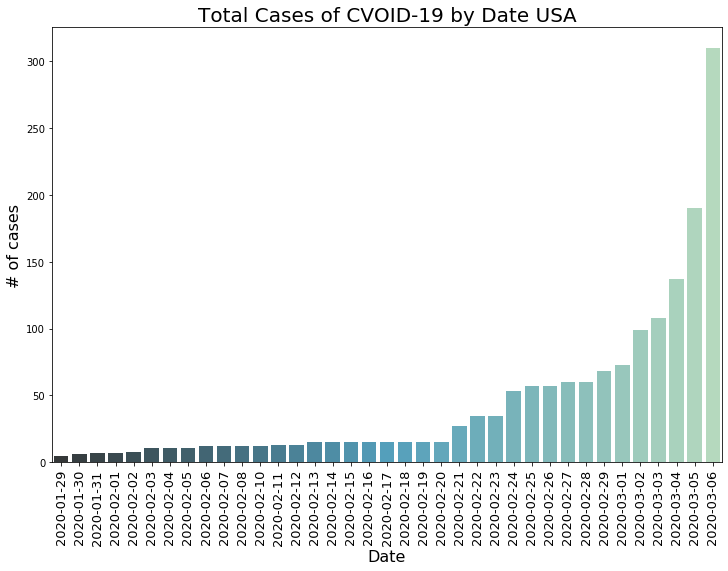

In [61]:
country_total_plot(USA)

In [79]:
SWEDEN = countrydf('Sweden', df)

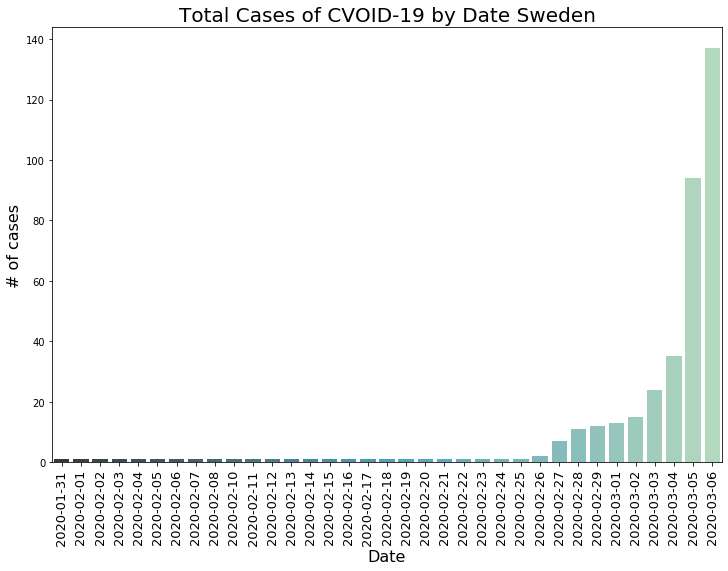

In [80]:
country_total_plot(SWEDEN)

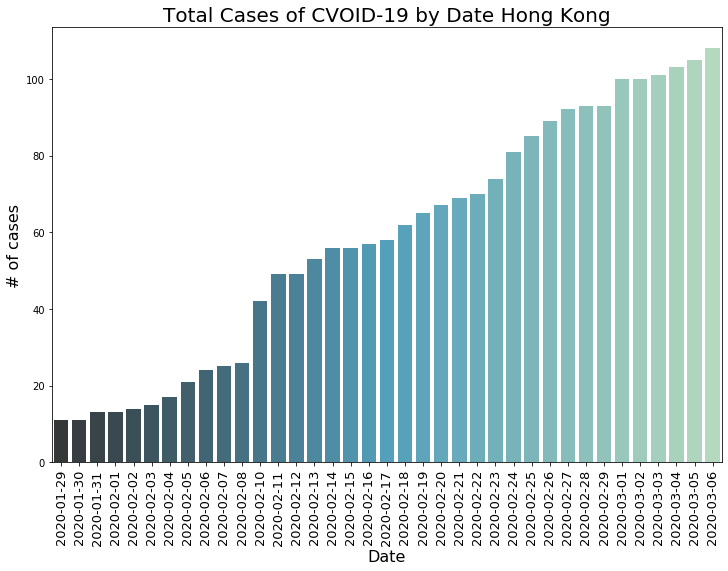

In [95]:
HK = countrydf('Hong Kong', df)
country_total_plot(HK)

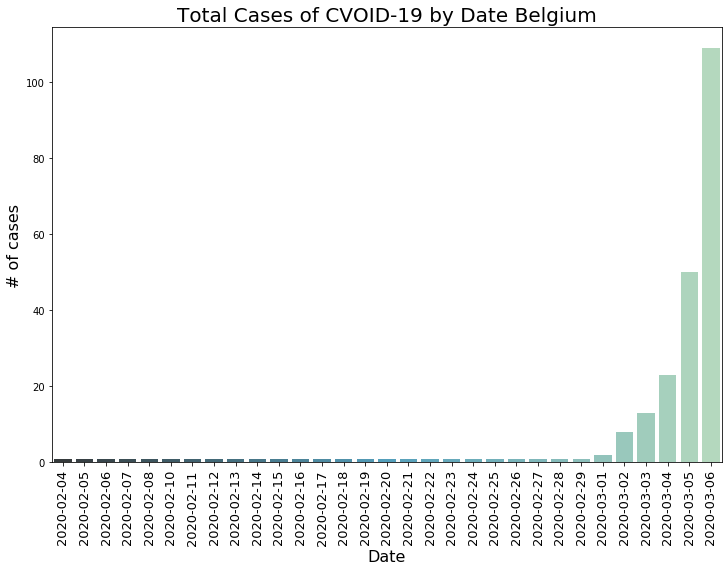

In [101]:
BELGIUM = countrydf('Belgium', df)
country_total_plot(BELGIUM)

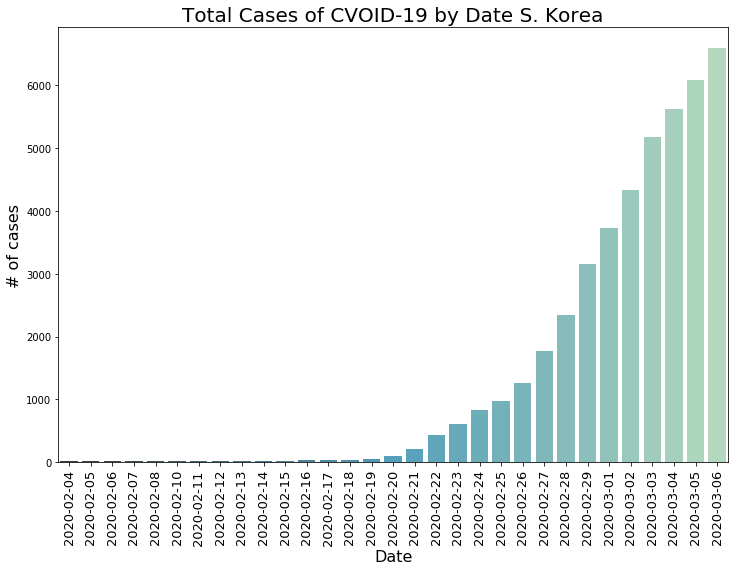

In [103]:
S_KOREA = countrydf('S. Korea', df)
country_total_plot(S_KOREA)

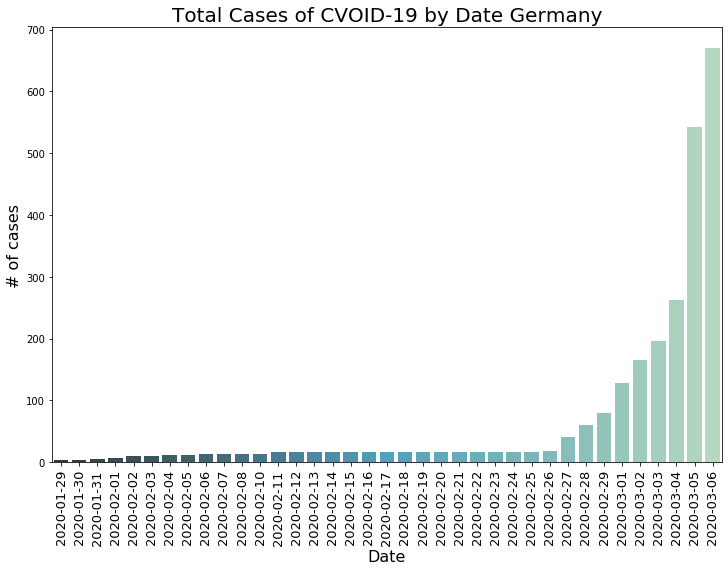

In [107]:
GERMANY = countrydf('Germany', df)
country_total_plot(GERMANY)

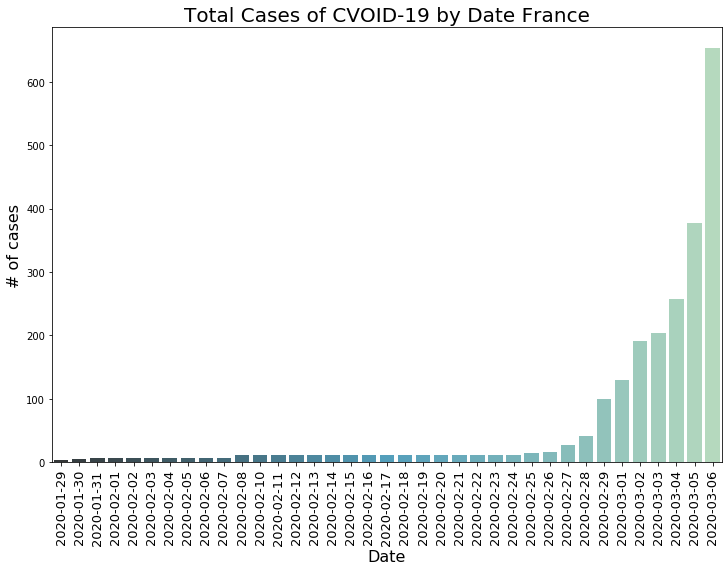

In [109]:
FRANCE = countrydf('France', df)
country_total_plot(FRANCE)

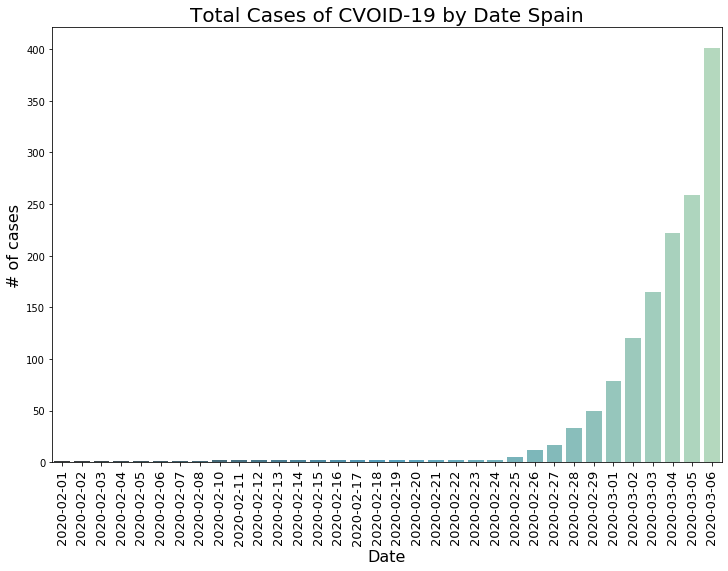

In [111]:
SPAIN = countrydf('Spain', df)
country_total_plot(SPAIN)

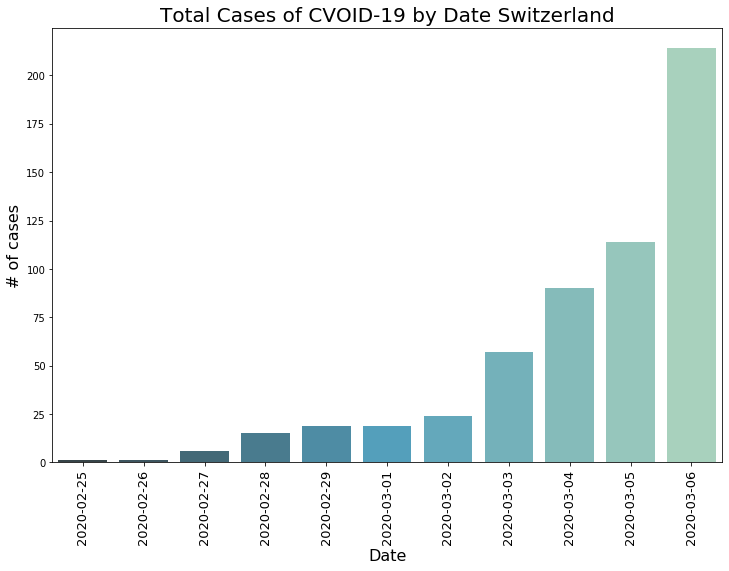

In [112]:
SWITZERLAND = countrydf('Switzerland', df)
country_total_plot(SWITZERLAND)

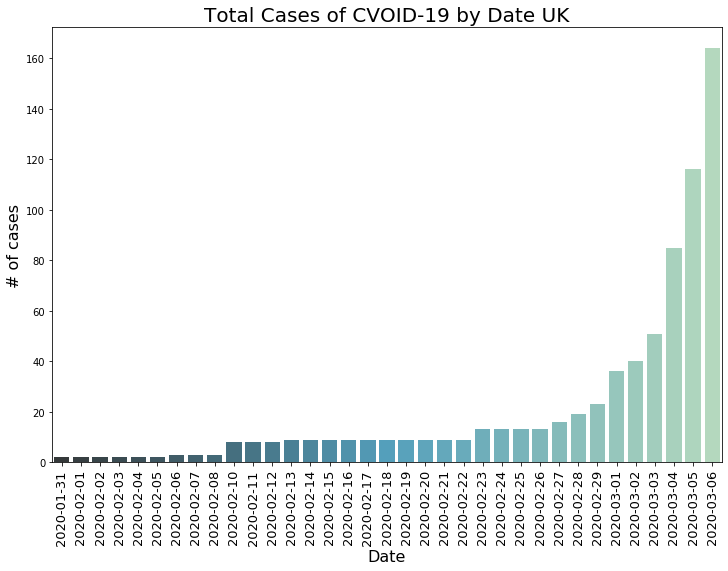

In [113]:
UK = countrydf('UK', df)
country_total_plot(UK)

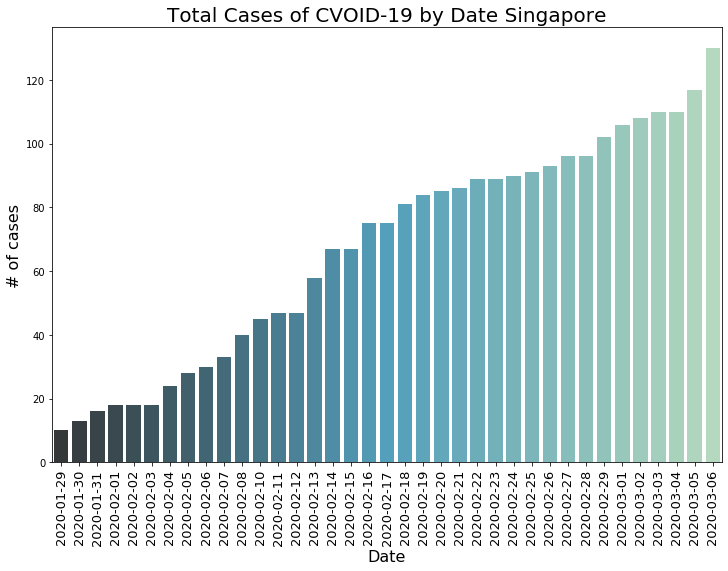

In [114]:
Singapore = countrydf('Singapore', df)
country_total_plot(Singapore)

In [ ]:
IRAN = countrydf('Iran', df)
country_total_plot(Singapore)

In [ ]:
Singapore = countrydf('Singapore', df)
country_total_plot(Singapore)

In [72]:
country_over_100 = ['Hong Kong',
 'Belgium',
 'Norway',
 'Netherlands',
 'Singapore',
 'Sweden',
 'UK',
 'Switzerland',
 'USA',
 'Spain',
 'France',
 'Germany',
 'Italy',
 'Iran',
 'S. Korea',]

In [83]:
infected_countries = df[(df['date'] == '2020-03-06') & (df['TotalCases'] > 100) & (df['TotalCases'] < 7000)] 

In [69]:
country_over_100 = infected_countries['Country'].to_list()

In [93]:

# plt.figure(figsize=(12,8))
# ax = sns.lineplot(x=infected_countries['date'].dt.date, y=infected_countries['TotalCases'], hue=infected_countries['Country'])

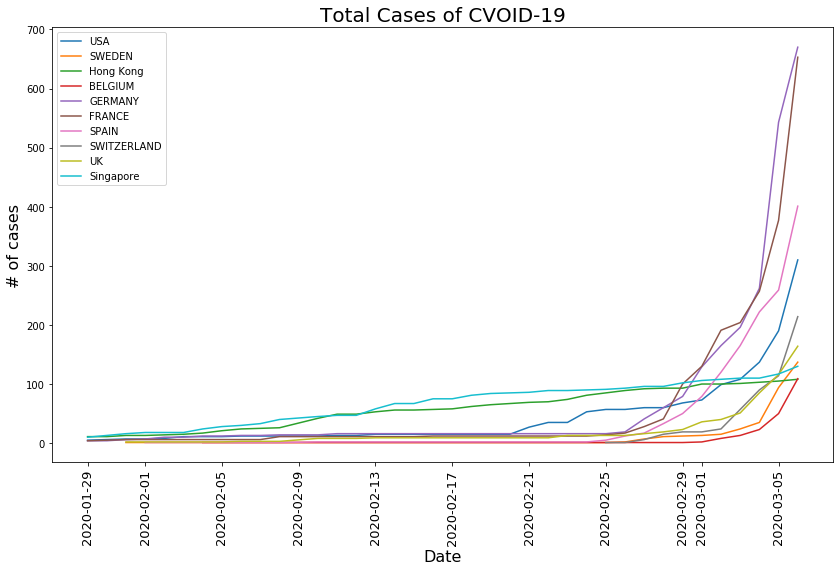

In [119]:
plt.figure(figsize=(14,8))
sns.lineplot(x=USA['date'].dt.date, y=USA['TotalCases'],
                  data=USA, label='USA')
sns.lineplot(x=SWEDEN['date'].dt.date, y=SWEDEN['TotalCases'],
                  data=SWEDEN, label='SWEDEN')
sns.lineplot(x=HK['date'].dt.date, y=HK['TotalCases'],
                  data=HK, label='Hong Kong')
sns.lineplot(x=BELGIUM['date'].dt.date, y=BELGIUM['TotalCases'],
                  data=BELGIUM, label='BELGIUM')
sns.lineplot(x=GERMANY['date'].dt.date, y=GERMANY['TotalCases'],
                  data=GERMANY, label='GERMANY')
sns.lineplot(x=FRANCE['date'].dt.date, y=FRANCE['TotalCases'],
                  data=FRANCE, label='FRANCE')
sns.lineplot(x=SPAIN['date'].dt.date, y=SPAIN['TotalCases'],
                  data=SPAIN, label='SPAIN')
sns.lineplot(x=SWITZERLAND['date'].dt.date, y=SWITZERLAND['TotalCases'],
                  data=SWITZERLAND, label='SWITZERLAND')
sns.lineplot(x=UK['date'].dt.date, y=UK['TotalCases'],
                  data=UK, label='UK')
sns.lineplot(x=Singapore['date'].dt.date, y=Singapore['TotalCases'],
                  data=Singapore, label='Singapore')
plt.xticks(rotation=90, fontsize=13)
plt.title(f'Total Cases of CVOID-19', fontsize=20)
plt.ylabel('# of cases', fontsize=16)
plt.xlabel('Date', fontsize=16)

ax.legend()

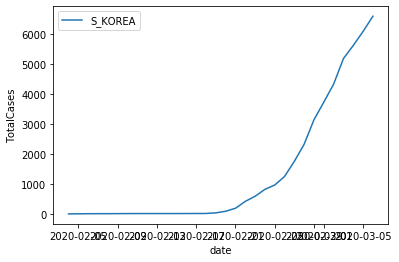

In [106]:
sns.lineplot(x=S_KOREA['date'].dt.date, y=S_KOREA['TotalCases'],
                  data=S_KOREA, label='S_KOREA')